# Heart Disease Risk Prediction with Explainable Machine Learning

# 1. Loading Data

In [ ]:
!pip install mlcroissant

In [28]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()


  -  [Metadata(UCI Heart Disease Data)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="heart_disease_uci.csv")]


,heart_disease_uci.csv/id,heart_disease_uci.csv/age,heart_disease_uci.csv/sex,heart_disease_uci.csv/dataset,heart_disease_uci.csv/cp,heart_disease_uci.csv/trestbps,heart_disease_uci.csv/chol,heart_disease_uci.csv/fbs,heart_disease_uci.csv/restecg,heart_disease_uci.csv/thalch,heart_disease_uci.csv/exang,heart_disease_uci.csv/oldpeak,heart_disease_uci.csv/slope,heart_disease_uci.csv/ca,heart_disease_uci.csv/thal,heart_disease_uci.csv/num
0,b'1',63,b'Male',b'Cleveland',b'typical angina',145.0,233.0,True,b'lv hypertrophy',150.0,False,2.3,b'downsloping',0.0,b'fixed defect',0
1,b'2',67,b'Male',b'Cleveland',b'asymptomatic',160.0,286.0,False,b'lv hypertrophy',108.0,True,1.5,b'flat',3.0,b'normal',2
2,b'3',67,b'Male',b'Cleveland',b'asymptomatic',120.0,229.0,False,b'lv hypertrophy',129.0,True,2.6,b'flat',2.0,b'reversable defect',1
3,b'4',37,b'Male',b'Cleveland',b'non-anginal',130.0,250.0,False,b'normal',187.0,False,3.5,b'downsloping',0.0,b'normal',0
4,b'5',41,b'Female',b'Cleveland',b'atypical angina',130.0,204.0,False,b'lv hypertrophy',172.0,False,1.4,b'upsloping',0.0,b'normal',0


In [29]:
for col in record_set_df.columns:
    if record_set_df[col].dtype == object:
        record_set_df[col] = record_set_df[col].apply(lambda x: x.decode() if isinstance(x, bytes) else x)

# Confirm the fix
record_set_df.head()

,heart_disease_uci.csv/id,heart_disease_uci.csv/age,heart_disease_uci.csv/sex,heart_disease_uci.csv/dataset,heart_disease_uci.csv/cp,heart_disease_uci.csv/trestbps,heart_disease_uci.csv/chol,heart_disease_uci.csv/fbs,heart_disease_uci.csv/restecg,heart_disease_uci.csv/thalch,heart_disease_uci.csv/exang,heart_disease_uci.csv/oldpeak,heart_disease_uci.csv/slope,heart_disease_uci.csv/ca,heart_disease_uci.csv/thal,heart_disease_uci.csv/num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 2. Data Preprocessing

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 2.1 Decode Byte Strings

In [31]:

# Step 1: Decode byte strings (only needed once)
for col in record_set_df.columns:
    if record_set_df[col].dtype == object:
        record_set_df[col] = record_set_df[col].apply(lambda x: x.decode() if isinstance(x, bytes) else x)


## 2.2 Rename columns for clarity

In [32]:
record_set_df.columns = [col.split('/')[-1] for col in record_set_df.columns]
record_set_df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 2.3 Initial Inspection

In [33]:
print("🔍 NULL VALUES:")
print(record_set_df.isnull().sum())
print("\n📊 DATA TYPES:")
print(record_set_df.dtypes)
print("\n🎯 UNIQUE TARGET VALUES:")
print(record_set_df['num'].unique())

🔍 NULL VALUES:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

📊 DATA TYPES:
id           object
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

🎯 UNIQUE TARGET VALUES:
[0 2 1 3 4]


## 2.4 preprocess the data

✅ Cleans & imputes

✅ Encodes categorical features

✅ Scales numerics

In [34]:
# Drop columns with too many missing values
record_set_df.drop(columns=['ca'], inplace=True, errors='ignore')

# Impute missing numerical values with mean
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    if col in record_set_df.columns:
        record_set_df[col] = pd.to_numeric(record_set_df[col], errors='coerce')  # Convert to numeric if needed
        record_set_df[col] = record_set_df[col].fillna(record_set_df[col].mean())

# Convert categorical features into dummies
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
record_set_df = pd.get_dummies(record_set_df, columns=categorical_cols, drop_first=True)

# Rename target column and binarize
record_set_df.rename(columns={'num': 'target'}, inplace=True)
record_set_df['target'] = record_set_df['target'].apply(lambda x: 1 if int(x) > 0 else 0)

# Scale numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
record_set_df[numerical_cols] = scaler.fit_transform(record_set_df[numerical_cols])

## 2.5 Train - Test Split

In [49]:
X = record_set_df.drop('target', axis=1).select_dtypes(include='number')
y = record_set_df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Final confirmation
print("\n✅ CLEANING & SPLITTING COMPLETE")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)



✅ CLEANING & SPLITTING COMPLETE
Training set: (736, 5)
Testing set: (184, 5)


# 3. Exploratory Data Analysis

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure inline plotting (for some environments)
%matplotlib inline

## 3.1 Target class distribution

### 🟦 Target Class Distribution


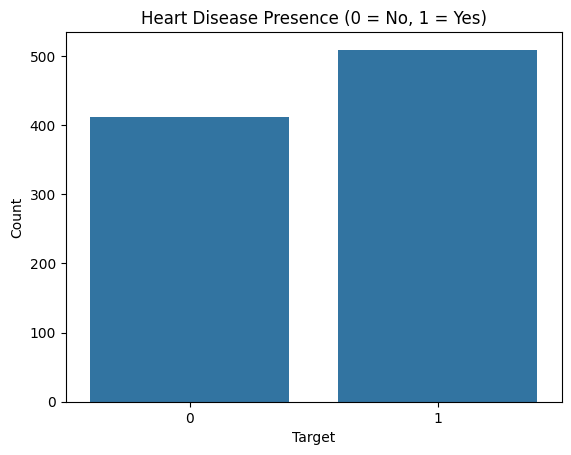


📊 Class Distribution (%):
target
1    55.326087
0    44.673913
Name: proportion, dtype: float64


In [51]:
print("### 🟦 Target Class Distribution")

sns.countplot(x='target', data=record_set_df)
plt.title('Heart Disease Presence (0 = No, 1 = Yes)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Percentage breakdown
print("\n📊 Class Distribution (%):")
print(record_set_df['target'].value_counts(normalize=True) * 100)

## 3.2 Numeric Feature Distributions

### 🟧 Numeric Feature Distributions


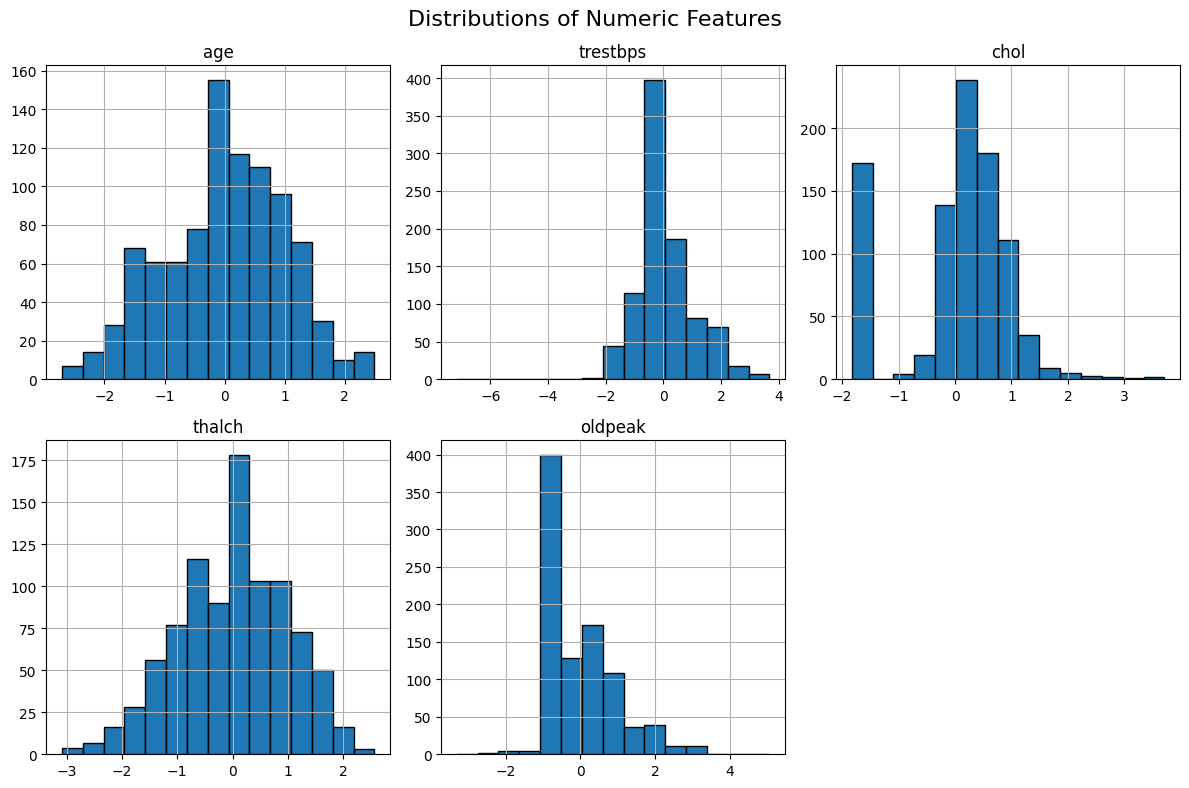

In [52]:
print("### 🟧 Numeric Feature Distributions")

record_set_df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].hist(
    bins=15, figsize=(12, 8), layout=(2, 3), edgecolor='black'
)
plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


## 3.3 Correlation Matrix

### 🟥 Correlation Heatmap


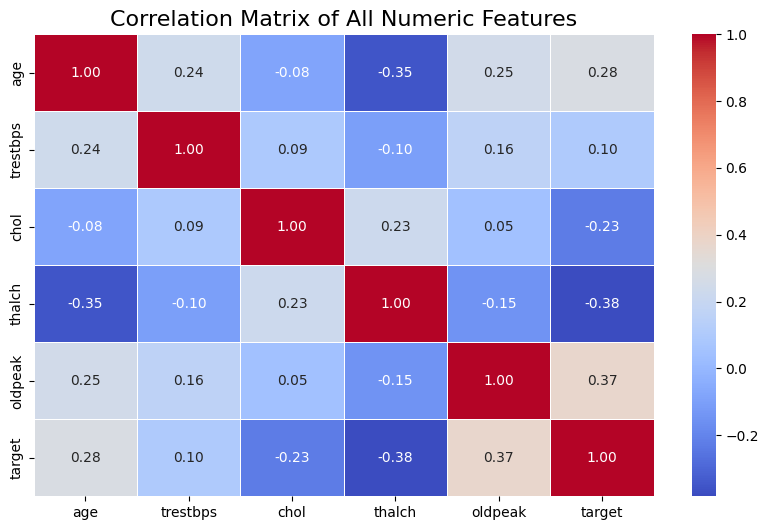

In [53]:
print("### 🟥 Correlation Heatmap")

plt.figure(figsize=(10, 6))  # Smaller plot size
numeric_df = record_set_df.select_dtypes(include=['number'])  # ✅ Keep only numeric
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Numeric Features', fontsize=16)
plt.show()


## 3.4 Chest Pain vs Heart Disease

### 🟨 Chest Pain Type vs Heart Disease


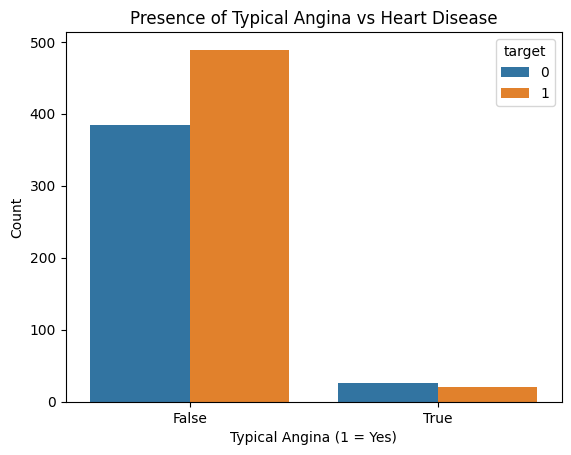

In [54]:
print("### 🟨 Chest Pain Type vs Heart Disease")

if 'cp_typical angina' in record_set_df.columns:
    sns.countplot(x='cp_typical angina', hue='target', data=record_set_df)
    plt.title('Presence of Typical Angina vs Heart Disease')
    plt.xlabel('Typical Angina (1 = Yes)')
    plt.ylabel('Count')
    plt.show()


## 3.5 Exercise-Induced Angina vs Heart Disease

### 🟩 Exercise-Induced Angina vs Heart Disease


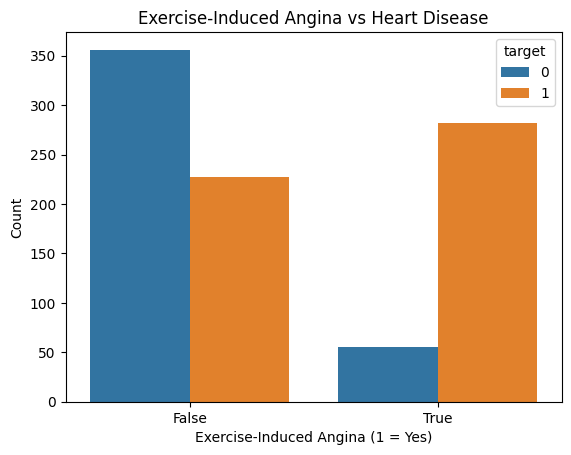

In [55]:
print("### 🟩 Exercise-Induced Angina vs Heart Disease")

if 'exang_True' in record_set_df.columns:
    sns.countplot(x='exang_True', hue='target', data=record_set_df)
    plt.title('Exercise-Induced Angina vs Heart Disease')
    plt.xlabel('Exercise-Induced Angina (1 = Yes)')
    plt.ylabel('Count')
    plt.show()


## 3.6 Sex vs Heart Disease

### 🟪 Sex (Male) vs Heart Disease


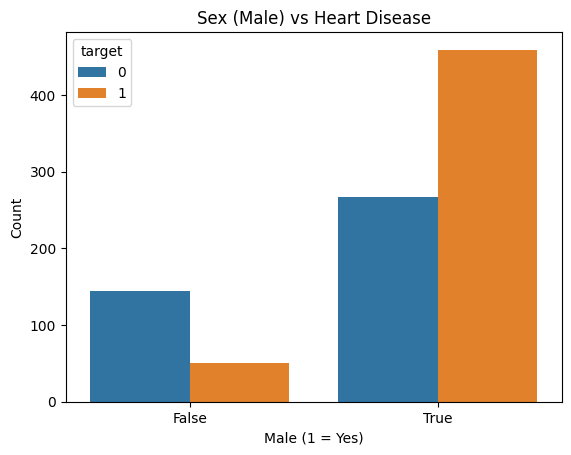

In [56]:
print("### 🟪 Sex (Male) vs Heart Disease")

if 'sex_Male' in record_set_df.columns:
    sns.countplot(x='sex_Male', hue='target', data=record_set_df)
    plt.title('Sex (Male) vs Heart Disease')
    plt.xlabel('Male (1 = Yes)')
    plt.ylabel('Count')
    plt.show()


## Max Heart Rate (thalch) vs Target

### 🔷 Max Heart Rate vs Heart Disease


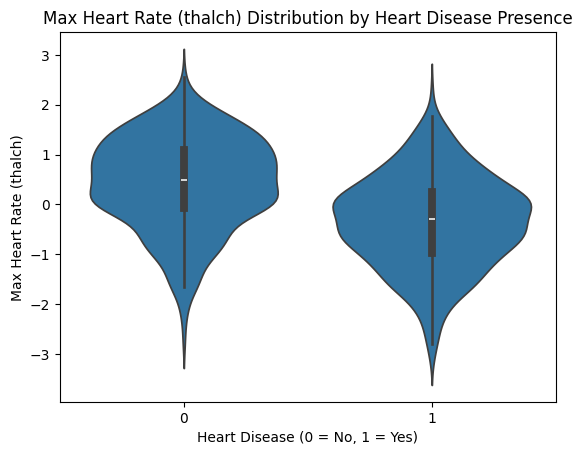

In [57]:
print("### 🔷 Max Heart Rate vs Heart Disease")

sns.violinplot(x='target', y='thalch', data=record_set_df)
plt.title('Max Heart Rate (thalch) Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate (thalch)')
plt.show()


# 4. Model Training & Evaluation

## 4.1 Import All Required Libraries

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

## 4.2 Train Logistic Regression

In [59]:
# Instantiate and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]


## 4.3 Print Evaluation Metrics

In [60]:
print("### 📊 Logistic Regression Performance")

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")

### 📊 Logistic Regression Performance
Accuracy:  0.7554
Precision: 0.7664
Recall:    0.8039
F1 Score:  0.7847
AUC Score: 0.8138


## 4.4 Confusion Matrix

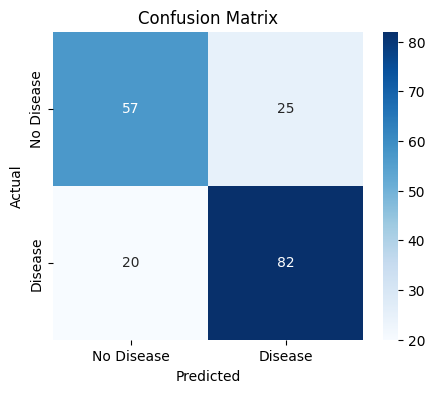

In [61]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4.5 ROC Curve

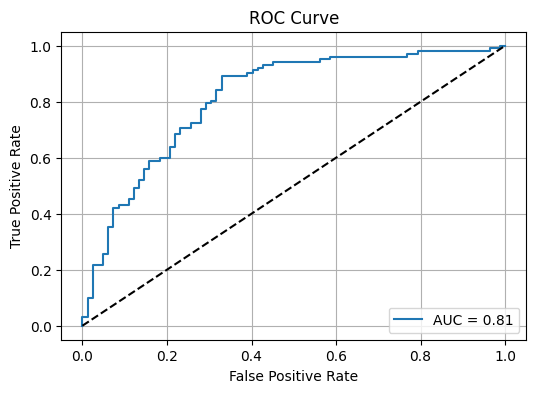

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 5. Building powerful model

## 5.1 Model Training with XGBoost

### 5.1.2 Instal XGBoost

In [63]:
!pip install -q xgboost


### 5.1.2  Train the Model

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Instantiate and train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]


### 5.1.3 Evaluation Metrics

In [65]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

print("### 📊 XGBoost Performance")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_xgb):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_xgb_prob):.4f}")

### 📊 XGBoost Performance
Accuracy:  0.7609
Precision: 0.7843
Recall:    0.7843
F1 Score:  0.7843
AUC Score: 0.7967


### 5.1.4  Confusion Matrix

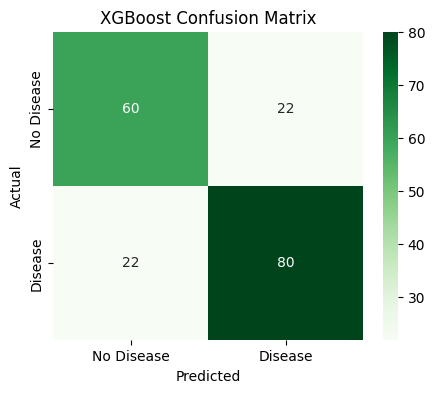

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


5.1.5 ROC Curve

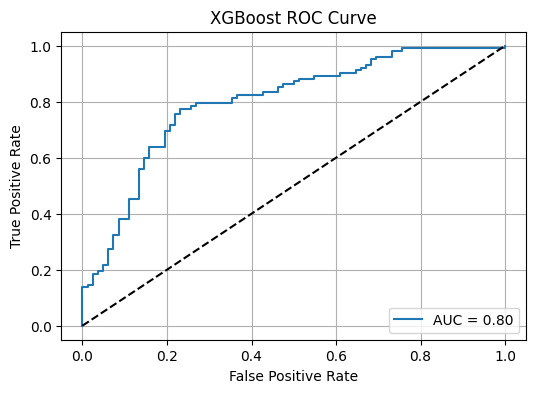

In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_xgb_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 5.1.6 Feature Importance

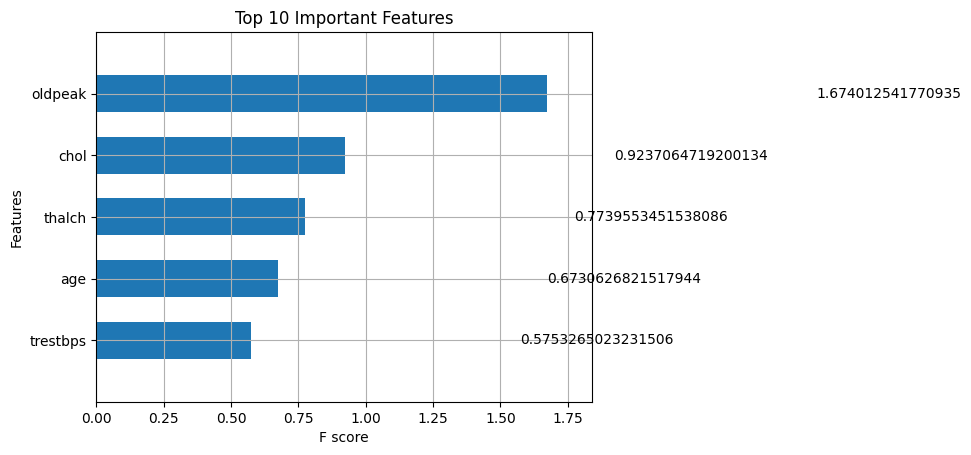

In [70]:
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', height=0.6)
plt.title('Top 10 Important Features')
plt.show()


## 5.2 SHAP Explainability for XGBoost Model

### 5.2.1 Install and Import SHAP

In [71]:
!pip install -q shap
import shap
import matplotlib.pyplot as plt
shap.initjs()

### 5.2.2 Create SHAP Explainer for XGBoost

In [72]:
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)


### 5.2.3 Global Summary Plot


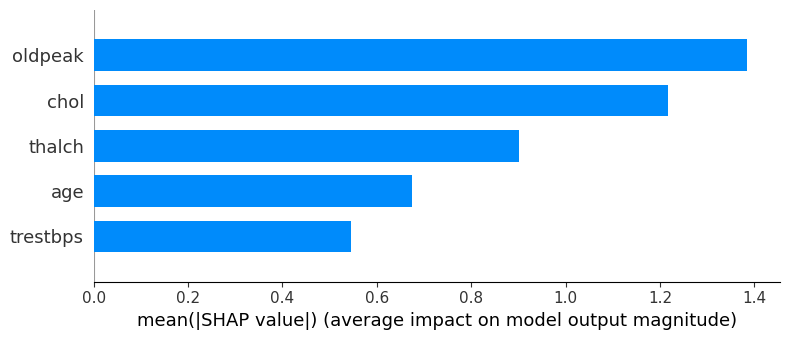

In [73]:
# Summary plot: how each feature impacts predictions across all patients
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)


### 5.2.4 Detailed Beeswarm Plot

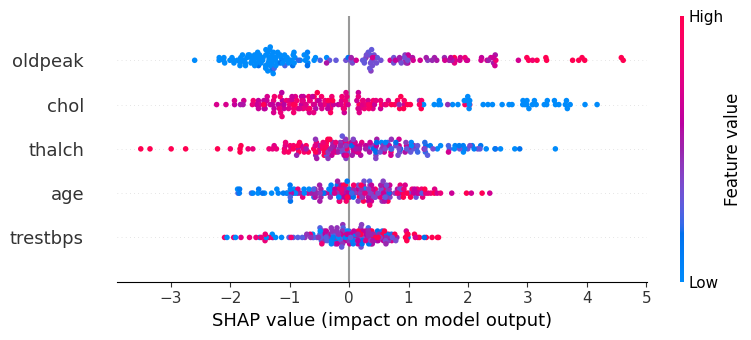

In [74]:
# Beeswarm plot: distribution of feature impacts per sample
shap.summary_plot(shap_values, X_test, plot_type="dot", show=True)


### 5.2.5 Force Plot for a Single Patient

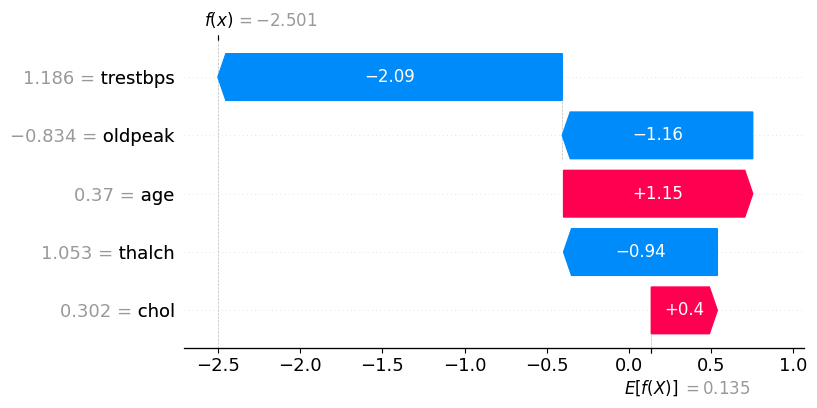

In [80]:
# Pick one patient (sample index from test set)
index = 10

# Recalculate SHAP if needed
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[10])

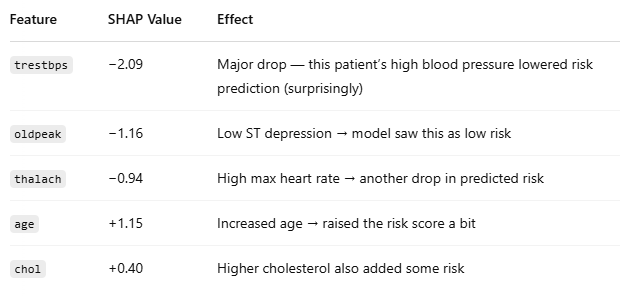

# Final Model Behavior

* The model started at a neutral risk level of ~0.135

* After adding/subtracting all feature effects (SHAP values), it landed at:
  * f(x) = -2.501 (raw model output)
  * This becomes a very low probability (near 0) after sigmoid
  * The model predicted: No Disease



# Summary


## For this patient, low ST depression and high heart rate pushed the prediction toward low heart disease risk, while age and cholesterol added some counter-weight.
## This plot gives clinicians insight into why the AI reached its decision — a crucial part of building trust in healthcare models
